# **HOTEL BOOKING**


# PROBLEM STATEMENT
In this project we will be working on a Data Science process that will enable us give insights to the Online Booking Orders to help Management review the current performance of the Business in order to make strategic decisions.

## ANALYSIS QUESTIONS
### Objective 1: Which are the top destinations for customers?
1.	Which are the top 3 most frequently used hotels in a country and 5 less frequent hotels
2.	Which are 3 top destinations for customers both countries and cities
3.	Are the top 3 hotel located in top destination countries?

### Objective 2: To provide insights on Top Countries Customers prefer to visit.
4.	which counties have highest and lowest hotel ratings
5.	which are the payment methods that’s are used in the top 5 countries where Customers who prefer to visit?
6.	Which countries that profit margin
7.	Which countries give more discount
8. 	Which countries charge high and low tax?

### Objective 3: To evaluate customer profile and demographics?
9.	Calculate the maximum, minimum and average number of days’ customers stay in a given hotel
10.	Which is the most used payment method?
11.	Which top 2 countries do most customers come from?
12.	Which states provide many customers?
13.	Where are many customers located?
14.	Which gender love travelling?
15.	Which age group are most travelers
16.	Which destination country do the most traveling age group travel to?

# IMPORTING LIBRARIES

In [3]:
# Importing pandas

import pandas as pd

# Importing Numpy

import numpy as np


import matplotlib.pyplot as plt

# DATA UNDERSTADING

In [4]:
# Reading the dataset
df = pd.read_excel('Hostel Booking Challenge_FestMan.xlsx', engine='openpyxl')

In [5]:
#Previewing the first 10 and last 10 records

print(df.head(10))
print(df.tail(10))

  Booking ID Date of Booking  Year      Time Customer ID  Gender  Age  \
0  DDMY00001      2010-01-01  2010  10:49:40     MY00001    Male   42   
1  DDID00002      2010-01-01  2010  09:19:47     ID00001  Female   44   
2  DDSG00003      2010-01-01  2010  11:52:56     SG00001  Female   31   
3  DDSG00004      2010-01-01  2010  13:44:40     SG00002    Male   28   
4  DDKH00005      2010-01-01  2010  05:38:26     KH00001    Male   44   
5  DDTH00006      2010-01-01  2010  05:41:55     TH00001    Male   32   
6  DDTH00007      2010-01-01  2010  20:14:21     TH00002    Male   49   
7  DDMY00008      2010-01-01  2010  00:22:07     MY00002  Female   58   
8  DDSG00009      2010-01-01  2010  09:30:32     SG00003    Male   57   
9  DDSG00010      2010-01-01  2010  16:22:39     SG00004  Female   41   

  Origin Country        State         Location  ...          Hotel Name  \
0       Malaysia        Johor  Iskandar Puteri  ...        Hotel Triton   
1      Indonesia        Ciawi        West Java

In [6]:
#Checking info 

def data(a):
    x = a.info()
    y = a.shape
    z = a.size
    return x, y, z


data(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66535 entries, 0 to 66534
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Booking ID           66535 non-null  object        
 1   Date of Booking      66535 non-null  datetime64[ns]
 2   Year                 66535 non-null  int64         
 3   Time                 66535 non-null  object        
 4   Customer ID          66535 non-null  object        
 5   Gender               66535 non-null  object        
 6   Age                  66535 non-null  int64         
 7   Origin Country       66535 non-null  object        
 8   State                66535 non-null  object        
 9   Location             66535 non-null  object        
 10  Destination Country  66535 non-null  object        
 11  Destination City     66535 non-null  object        
 12  No. Of People        66535 non-null  int64         
 13  Check-in date        66535 non-

(None, (66535, 27), 1796445)

In [7]:
#Checking foe statistical summary
df.describe()

,Year,Age,No. Of People,No. Of Days,Rooms,Hotel Rating,No. Of Days.1,Rooms.1,Booking Price[SGD],Discount,GST,Profit Margin
count,66535.000000,66535.000000,66535.000000,66535.000000,66535.000000,66535.000000,66535.000000,66535.000000,66535.000000,66535.000000,6.653500e+04,66535.000000
mean,2015.132396,38.436402,3.995852,3.233787,2.283400,4.288508,3.233787,2.283400,214.054212,0.125473,7.000000e-02,0.188815
std,2.885649,11.556566,2.000116,3.377939,1.031154,0.275520,3.377939,1.031154,108.127280,0.075115,4.163368e-17,0.052766
min,2010.000000,19.000000,1.000000,1.000000,1.000000,3.300000,1.000000,1.000000,35.000000,0.000000,7.000000e-02,0.100000
25%,2013.000000,28.000000,2.000000,1.000000,1.000000,4.200000,1.000000,1.000000,125.000000,0.060000,7.000000e-02,0.140000
50%,2015.000000,38.000000,4.000000,2.000000,2.000000,4.300000,2.000000,2.000000,199.000000,0.130000,7.000000e-02,0.200000
75%,2018.000000,48.000000,6.000000,4.000000,3.000000,4.500000,4.000000,3.000000,293.000000,0.190000,7.000000e-02,0.230000
max,2019.000000,58.000000,7.000000,97.000000,4.000000,4.700000,97.000000,4.000000,578.000000,0.250000,7.000000e-02,0.300000


# DATA CLEANING

## 1.1 DATA VALIDITY

In [8]:
#droping repeated columns

df.drop(columns=['No. Of Days.1', 'Rooms.1'], inplace=True)

In [9]:
df.columns

Index(['Booking ID', 'Date of Booking', 'Year', 'Time', 'Customer ID',
       'Gender', 'Age', 'Origin Country', 'State', 'Location',
       'Destination Country', 'Destination City', 'No. Of People',
       'Check-in date', 'No. Of Days', 'Check-Out Date', 'Rooms', 'Hotel Name',
       'Hotel Rating', 'Payment Mode', 'Bank Name', 'Booking Price[SGD]',
       'Discount', 'GST', 'Profit Margin'],
      dtype='object')

## 1.2. ACCURACY

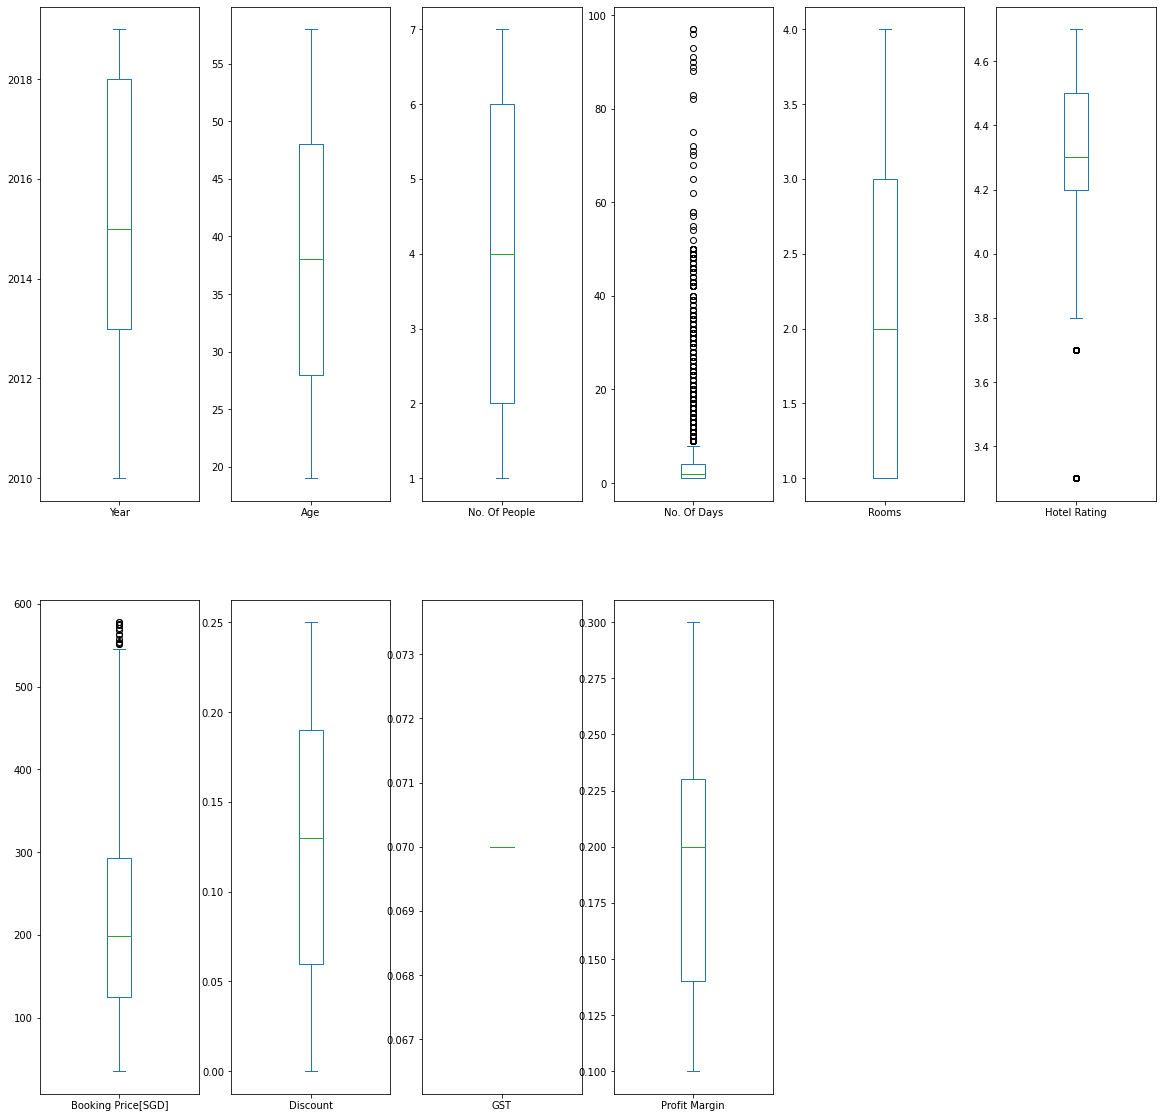

In [10]:
#Checking for outliers
df.plot(kind='box', subplots = True, layout=(2,6), sharex= False, sharey = False, figsize= (20,20))
plt.show()

In [11]:
#dealing with outliers
# No fo days column
#Procedure1
outliers=[]

def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

len(detect_outlier(df['No. Of Days']))


423

In [12]:
#Procedure 2
#Verying if the data enter in no of days is correct 

#Changing data type for both Check out date and check in date
df['Check-Out Date'] = pd.to_datetime(df['Check-Out Date'])
df['Check-in date'] = pd.to_datetime(df['Check-in date'])

#Create a column tp show the diffrence between check out date and check in date
df['Date_Diffrence'] = df['Check-Out Date'] - df['Check-in date']

#After finding the diffrence no we change the datatype ot the new column from tyme delta to string inoder to remove the days part 
df['Date_Diffrence'] = df['Date_Diffrence'].astype(str).str.replace('days', '')

#After removing the days part now we can convert from string to numeric to fitt the No. Of Days column for comparison.
df['Date_Diffrence'] = pd.to_numeric(df['Date_Diffrence'])

# We then create anothe column to show if the number of days are the same as the diffrence we computed
df['Comparison'] = np.where(df['No. Of Days'] == df['Date_Diffrence'], 1, 0) # 1(True) and 0(False)

#Locate where comparison is 0 
df.loc[df['Comparison'] == 0]

#In this case there are no records where comaprison in 0 so meaning the data is acurate


,Booking ID,Date of Booking,Year,Time,Customer ID,Gender,Age,Origin Country,State,Location,...,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Booking Price[SGD],Discount,GST,Profit Margin,Date_Diffrence,Comparison


In [13]:
#Hotel rating column
outliers=[]

len(detect_outlier(df['Hotel Rating']))

1296

In [14]:
#Booking price column
outliers=[]

len(detect_outlier(df['Booking Price[SGD]']))

16

## 1.3. COMPLETENESS

In [15]:
#Checking for null values

df.isnull().sum()

#There are no null values

Booking ID             0
Date of Booking        0
Year                   0
Time                   0
Customer ID            0
Gender                 0
Age                    0
Origin Country         0
State                  0
Location               0
Destination Country    0
Destination City       0
No. Of People          0
Check-in date          0
No. Of Days            0
Check-Out Date         0
Rooms                  0
Hotel Name             0
Hotel Rating           0
Payment Mode           0
Bank Name              0
Booking Price[SGD]     0
Discount               0
GST                    0
Profit Margin          0
Date_Diffrence         0
Comparison             0
dtype: int64

## 1.4. CONSISTENCY

In [16]:
#Cheking for duplicates

df.duplicated().sum()

0

## 1.5 UNFORMITY

In [17]:
df.columns = ['Booking_ID', 'Date_of_Booking', 'Year', 'Time', 'Customer_ID',
       'Gender', 'Age', 'Origin_Country', 'State', 'Location',
       'Destination_Country', 'Destination_City', 'No_Of_People',
       'Check_in_date', 'No_Of_Days', 'Check_Out_Date', 'Rooms', 'Hotel_Name',
       'Hotel_Rating', 'Payment_Mode', 'Bank_Name',
       'Booking_Price[SGD]', 'Discount', 'GST', 'Profit_Margin', 'Date_Diffrence', 'Comparison']
df.columns

Index(['Booking_ID', 'Date_of_Booking', 'Year', 'Time', 'Customer_ID',
       'Gender', 'Age', 'Origin_Country', 'State', 'Location',
       'Destination_Country', 'Destination_City', 'No_Of_People',
       'Check_in_date', 'No_Of_Days', 'Check_Out_Date', 'Rooms', 'Hotel_Name',
       'Hotel_Rating', 'Payment_Mode', 'Bank_Name', 'Booking_Price[SGD]',
       'Discount', 'GST', 'Profit_Margin', 'Date_Diffrence', 'Comparison'],
      dtype='object')

# ANALYSIS

### Objective 1: To the top destinations for customers?

In [18]:
#1.	Which are the top 3 most frequently used hotels in a country and 3 less frequent hotels?
hotels = df.groupby(['Hotel_Name'])['Booking_ID'].count()

#The top 3 most frequently used hotels
print(f"Top 3 most frequently used hotels: {hotels.sort_values(ascending=False).head(3)}")


print('-----------------------------------------------')
#The less frequent hotels
print(f"Top 3 most frequently used hotels: {hotels.sort_values(ascending=True).head(3)}")

Top 3 most frequently used hotels: Hotel_Name
Grand Hyatt       221
Secret Mirage     146
Enchanted Isle    146
Name: Booking_ID, dtype: int64
-----------------------------------------------
Top 3 most frequently used hotels: Hotel_Name
The Cottage Motel     73
Simply Charmed B&B    75
Star of Africa B&B    76
Name: Booking_ID, dtype: int64


In [19]:
hotel_counts = x.reset_index()
hotel_counts
#Histogram/bar

NameError: name 'x' is not defined

In [ ]:
#2.	Which are 2 top destinations for customers both countries and cities 2 unpopular destination?

#popular and unpopular destination countries 
print('>>>>>>COUNTRIES')
destination_country =df.groupby(['Destination_Country'])['Booking_ID'].count()
print(f'2 top destinations countries: {destination_country.sort_values(ascending=False).head(2)}')
print('-------------------------------------------')
print(f'2 unpopula destinations countries: {destination_country.sort_values(ascending=True).head(2)}')
print('-------------------------------------------')
#popular and unpopular destination cities
print('>>>>>>>CITIES')

destination_city =df.groupby(['Destination_City'])['Booking_ID'].count()
print(f'2 top destinations Cities: {destination_city.sort_values(ascending=False).head(2)}')
print('-------------------------------------------')
print(f'2 unpopular destinations Cities: {destination_city.sort_values(ascending=True).head(2)}')


>>>>>>COUNTRIES
2 top destinations countries: Destination_Country
New Zealand    3447
Nepal          3446
Name: Booking_ID, dtype: int64
-------------------------------------------
2 unpopula destinations countries: Destination_Country
Iran     3172
Kenya    3233
Name: Booking_ID, dtype: int64
-------------------------------------------
>>>>>>>CITIES
2 top destinations Cities: Destination_City
Hamilton    1084
Bello        646
Name: Booking_ID, dtype: int64
-------------------------------------------
2 unpopular destinations Cities: Destination_City
Curitiba    479
Kobe        486
Name: Booking_ID, dtype: int64


In [ ]:
#3.	Are the top 5 hotel located in top destination countries?

zeeland_nepal = df[(df['Destination_Country'] == 'New Zealand') | (df['Destination_Country'] == 'Nepal')]
lst = zeeland_nepal['Hotel_Name'].unique()
hotels = ['Grand Hyatt', 'Secret Mirage', 'Enchanted Isle']

for item in hotels:
    if item not in lst:
        print(item + 'does not belong to the top destination counties')
    else: 
        print(item + ' ... belongs to the top destination counties')

#Alternatevely 

main_list = [item for item in hotels if item in lst]
print('')
print('>>>>>> As a list')
print(main_list)


Grand Hyatt ... belongs to the top destination counties
Secret Mirage ... belongs to the top destination counties
Enchanted Isle ... belongs to the top destination counties

>>>>>> As a list
['Grand Hyatt', 'Secret Mirage', 'Enchanted Isle']


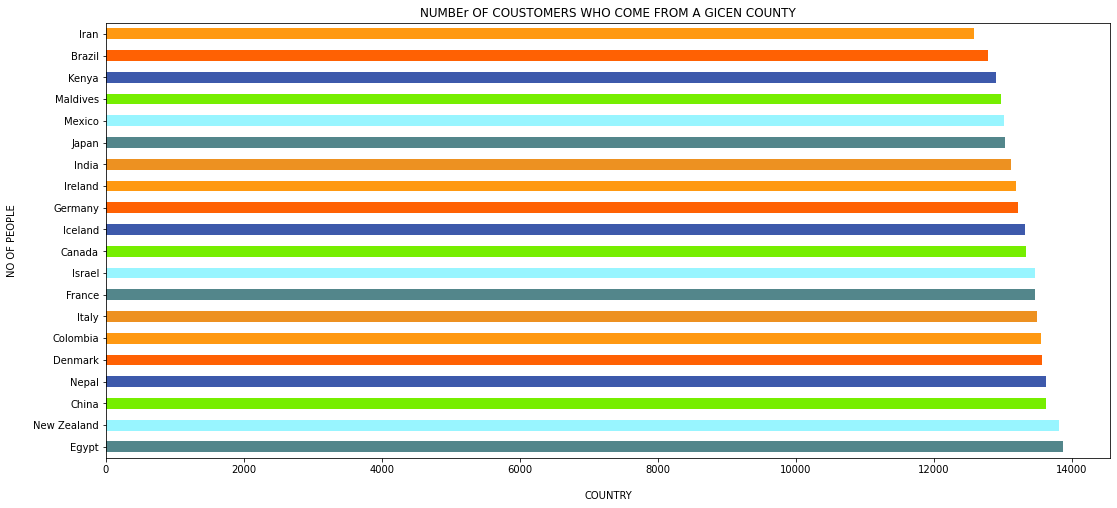

In [64]:
c = ['#53868B', '#98F5FF', '#76EE00', '#3D59AB', '#FF6103', '#FF9912', '#ED9121']
df.groupby('Destination_Country')['No_Of_People'].sum().sort_values(ascending=False).plot(kind='barh', color = c, figsize = (18,8))

plt.xlabel('COUNTRY', labelpad=(16))
plt.ylabel('NO OF PEOPLE', labelpad=(16))
plt.title('NUMBEr OF COUSTOMERS WHO COME FROM A GICEN COUNTY')
plt.show()

### Objective 2: To provide insights on Top Countries Customers prefer to visit.

In [ ]:
#4.	which 5 countries have the most highest and lowest hotel ratings
print('Minimum rarings is', df['Hotel_Rating'].min())
print('Maximum rating is', df['Hotel_Rating'].max())
print('------------------------------------------------------------')

min_ratings = df[df['Hotel_Rating'] == df['Hotel_Rating'].min()]
print("The countries with the most lowest hotel ratings")
print(min_ratings['Destination_Country'].value_counts().sort_values(ascending=True).head(5))
print('------------------------------------------------------------')

max_ratings = df[df['Hotel_Rating'] == df['Hotel_Rating'].max()]
print("The countries with the most highest hotel ratings")
print(max_ratings['Destination_Country'].value_counts().sort_values(ascending=False).head(5))


Minimum rarings is 3.3
Maximum rating is 4.7
------------------------------------------------------------
The countries with the most lowest hotel ratings
Ireland     51
China       57
Iceland     57
Italy       57
Maldives    57
Name: Destination_Country, dtype: int64
------------------------------------------------------------
The countries with the most highest hotel ratings
Egypt          98
France         87
New Zealand    73
Iceland        72
Canada         72
Name: Destination_Country, dtype: int64


In [ ]:
#graph


Index(['Booking_ID', 'Date_of_Booking', 'Year', 'Time', 'Customer_ID',
       'Gender', 'Age', 'Origin_Country', 'State', 'Location',
       'Destination_Country', 'Destination_City', 'No_Of_People',
       'Check_in_date', 'No_Of_Days', 'Check_Out_Date', 'Rooms', 'Hotel_Name',
       'Hotel_Rating', 'Payment_Mode', 'Bank_Name', 'Booking_Price[SGD]',
       'Discount', 'GST', 'Profit_Margin', 'Date_Diffrence', 'Comparison',
       'Profit'],
      dtype='object')

In [ ]:
#5.	which are the payment methods that’s are used in the top 5 countries where Customers who prefer to visit?
print('Popilar countries')
print(df.groupby(['Destination_Country'])['Booking_ID'].count().sort_values(ascending=False).head(5))

print('*******************************************')
mf = df[(df['Destination_Country'] == 'New Zealand') |(df['Destination_Country'] == 'Nepal') | (df['Destination_Country'] == 'Egypt') | (df['Destination_Country'] == 'Colombia') | (df['Destination_Country'] == 'China')]


mf.groupby('Payment_Mode')['Booking_ID'].count()

Popilar countries
Destination_Country
New Zealand    3447
Nepal          3446
Egypt          3422
Colombia       3408
China          3391
Name: Booking_ID, dtype: int64
*******************************************


Payment_Mode
COD                 3401
Credit Card         3449
Debit Card          3436
Internet Banking    3465
Wallet              3363
Name: Booking_ID, dtype: int64

In [ ]:
#6.	Which country has the highest and lowest profit
df['Profit'] = (df['Booking_Price[SGD]'] * df['Profit_Margin'])
print('Country with the highest profit')
print(df.groupby(['Destination_Country'])['Profit'].sum().sort_values(ascending = False).head(1))

print('')
print('The county with the lowest proft')
df.groupby(['Destination_Country'])['Profit'].sum().sort_values(ascending = True).head(1)


Country with the highest profit
Destination_Country
New Zealand    136193.11
Name: Profit, dtype: float64

The county with the lowest proft


Destination_Country
Iran    124134.0
Name: Profit, dtype: float64

In [ ]:
#7.	Which countries give more discount
df['Total_Discount'] = df['Booking_Price[SGD]'] * df['Discount']
df.groupby(['Destination_Country'])['Discount'].sum().sort_values(ascending = False).head(3)

Destination_Country
Nepal       432.60
China       432.52
Colombia    432.48
Name: Discount, dtype: float64

In [ ]:
#8.	Which countries receive high and low tax from vistors?
df['Tax'] = df['Booking_Price[SGD]'] * df['GST']
print('The country that recieves the highest tax is: ')
print(df.groupby('Destination_Country')['Tax'].sum().sort_values(ascending=False).head(2))

print('The country that recieves the lowest tax is: ')
df.groupby('Destination_Country')['Tax'].sum().sort_values(ascending=True).head(2)

The country that recieves the highest tax is: 
Destination_Country
New Zealand    51654.75
Colombia       51388.75
Name: Tax, dtype: float64
The country that recieves the lowest tax is: 


Destination_Country
Iran     47663.63
Japan    48019.93
Name: Tax, dtype: float64

Index(['Booking_ID', 'Date_of_Booking', 'Year', 'Time', 'Customer_ID',
       'Gender', 'Age', 'Origin_Country', 'State', 'Location',
       'Destination_Country', 'Destination_City', 'No_Of_People',
       'Check_in_date', 'No_Of_Days', 'Check_Out_Date', 'Rooms', 'Hotel_Name',
       'Hotel_Rating', 'Payment_Mode', 'Bank_Name', 'Booking_Price[SGD]',
       'Discount', 'GST', 'Profit_Margin', 'Date_Diffrence', 'Comparison',
       'Profit'],
      dtype='object')

### Objective 3: To evaluate customer profile and demographics?

In [ ]:
#9.	Calculate the maximum, minimum and average number of days’ customers stay in a given hotel
print(df['No_Of_Days'].min())
print(df['No_Of_Days'].max())
print(df['No_Of_Days'].mean())

1
97
3.233786728789359


In [ ]:
#10. Which is the most used payment method?

df['Payment_Mode'].value_counts().head()

In [40]:
#11. Which top 2 countries do most customers come from?
df.groupby('Origin_Country')['No_Of_People'].sum().sort_values(ascending=False).head(2)

Origin_Country
Thailand    48776
Malaysia    48485
Name: No_Of_People, dtype: int64

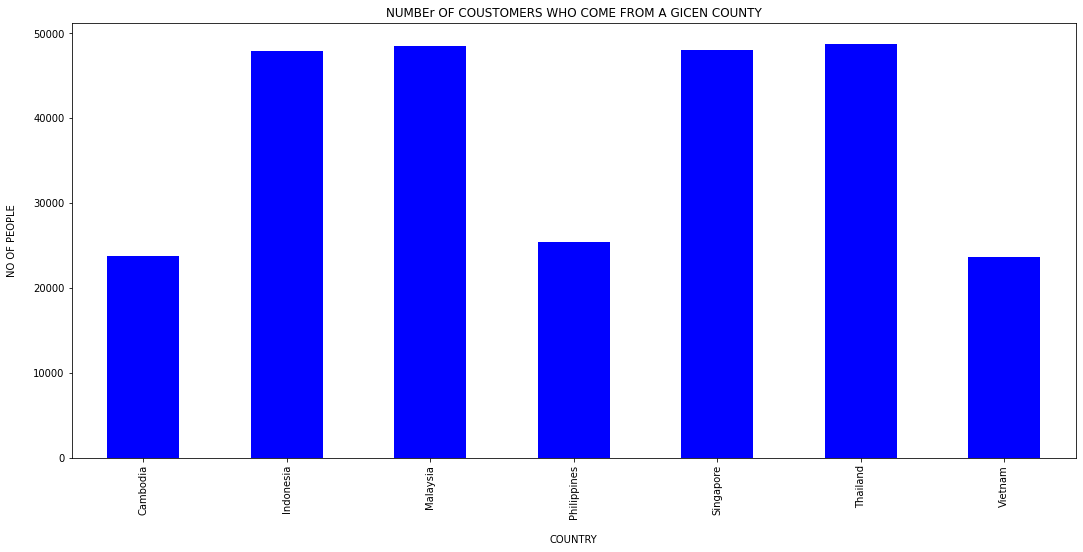

In [52]:
df.groupby('Origin_Country')['No_Of_People'].sum().plot(kind='bar', color = 'blue', figsize = (18,8))
plt.xlabel('COUNTRY', labelpad=(16))
plt.ylabel('NO OF PEOPLE', labelpad=(16))
plt.title('NUMBEr OF COUSTOMERS WHO COME FROM A GICEN COUNTY')
plt.show()

In [ ]:
#12. Which states provide many customers?
df.groupby('State')['Customer_ID'].count().sort_values(ascending=False).head(2)

State
Central    4820
West       2617
Name: Customer_ID, dtype: int64

In [ ]:
#13. Where are many customers located?
df.groupby(['Location'])['Customer_ID'].count().sort_values(ascending = False).head()

Location
Jakarta      3519
West Java    1521
Papua        1458
Kuching       984
Ipoh          978
Name: Customer_ID, dtype: int64

In [48]:
#14. Which gender love travelling?
x =df.groupby('Gender')['No_Of_People'].sum()
x

Gender
Female    133740
Male      132124
Name: No_Of_People, dtype: int64

Text(0.5, 1.0, 'COMPARISON BY GENDER')

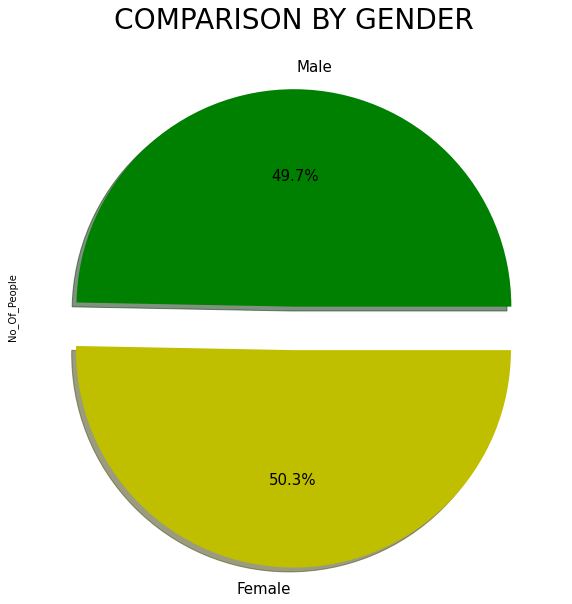

In [51]:
#14. Which gender love travelling?

explode = ([0.2, 0])

plot = x.plot.pie(y= 'No_Of_People', 
                                                                                                                      
figsize=(16, 10), colors = ['y', 'g'], 
labels = ['Female', 'Male'],

fontsize=15, explode=explode, autopct='%1.1f%%',counterclock=False, shadow=True)

plt.title('COMPARISON BY GENDER', fontsize=28)

In [ ]:
#16. Which destination country do the most traveling age group travel to?

df.groupby(['Destination_Country'])['No_Of_People'].sum().sort_values(ascending=False).head()

Destination_Country
Egypt          13862
New Zealand    13811
China          13628
Nepal          13624
Denmark        13561
Name: No_Of_People, dtype: int64

In [ ]:
df.columns

Index(['Booking_ID', 'Date_of_Booking', 'Year', 'Time', 'Customer_ID',
       'Gender', 'Age', 'Origin_Country', 'State', 'Location',
       'Destination_Country', 'Destination_City', 'No_Of_People',
       'Check_in_date', 'No_Of_Days', 'Check_Out_Date', 'Rooms', 'Hotel_Name',
       'Hotel_Rating', 'Payment_Mode', 'Bank_Name', 'Booking_Price[SGD]',
       'Discount', 'GST', 'Profit_Margin', 'Date_Diffrence', 'Comparison'],
      dtype='object')

### Obejective 3: To observe the trend across the years

In [ ]:
#17. Which year had the highst number of vistors

df.groupby('Year')['No_Of_People'].sum().sort_values(ascending=False).head(1)

Year
2019    38006
Name: No_Of_People, dtype: int64

In [ ]:
# 18. Which year had the  lowest number of vistors
df.groupby('Year')['No_Of_People'].sum().sort_values(ascending=True).head(1)

Year
2010    19147
Name: No_Of_People, dtype: int64

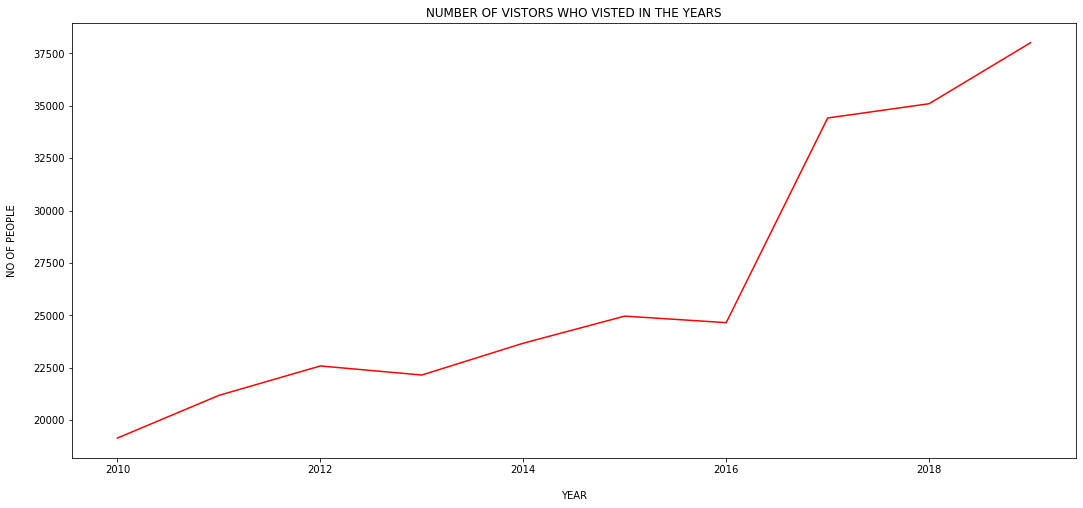

In [38]:
df.groupby('Year')['No_Of_People'].sum().plot(kind='line', color = 'red', figsize = (18,8))
plt.xlabel('YEAR', labelpad=(16))
plt.ylabel('NO OF PEOPLE', labelpad=(16))
plt.title('NUMBER OF VISTORS WHO VISTED IN THE YEARS')
plt.show()

In [ ]:
df.columns

NameError: name 'df' is not defined

In [ ]:
df.groupby('Year')['No_Of_People'].sum().plot(kind='line')

NameError: name 'df' is not defined